In [38]:
import scripts.proj1_helpers as helper
import implementations as imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


boson is -1

not boson is 1

In [6]:
y_train, x_train, ids_train = helper.load_csv_data('train.csv')
y_test, x_test, ids_test = helper.load_csv_data('test.csv')
print(x_train.shape)
print(x_test.shape)

(250000, 30)
(568238, 30)


In [7]:
print('Number of boson:', np.count_nonzero(y_train-1))
print('Number of other:', np.count_nonzero(y_train+1))

Number of boson: 164333
Number of other: 85667


In [8]:
def col_standardize(x):
    means = [np.mean(col) for col in x.T]
    stds = [np.std(col) for col in x.T]
    return (x - means) / stds

In [9]:
def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [10]:
std_x_train = standardize(x_train)
std_x_test = standardize(x_test)

In [11]:
col_std_x_train = col_standardize(x_train)
col_std_x_test = col_standardize(x_test)

In [12]:
y_train[y_train < 0] = 0

### Logistic regression

In [29]:
niter = 5000

In [39]:
start = time.perf_counter()
l, w, data = imp.stochastic_logistic_regression(y_train, std_x_train, max_iter=niter, batch_size=150, threshold=10**(-4))
end = time.perf_counter()

Current iteration=0, the loss=173286.79513998624
Current iteration=1, the loss=173206.5580415316
Current iteration=2, the loss=173126.48134782992
Current iteration=3, the loss=173046.56446238823
Current iteration=4, the loss=172966.80698363355
Current iteration=5, the loss=172887.20840877935
Current iteration=6, the loss=172807.76833230248
Current iteration=7, the loss=172728.48630748823
Current iteration=8, the loss=172570.31605323713
Current iteration=9, the loss=172412.7732563462
Current iteration=10, the loss=172177.51207722406
Current iteration=11, the loss=171943.64415254342
Current iteration=12, the loss=171633.81676113786
Current iteration=13, the loss=171249.76312843905
Current iteration=14, the loss=170793.6260771126
Current iteration=15, the loss=170267.92910415996
Current iteration=16, the loss=169601.82962293577
Current iteration=17, the loss=168802.53625572575
Current iteration=18, the loss=167807.9715390334
Current iteration=19, the loss=166633.73635603936
Current iterat

In [50]:
print("Runtime:", end - start)

Runtime: 124.4136517170009


In [49]:
len(data)

58

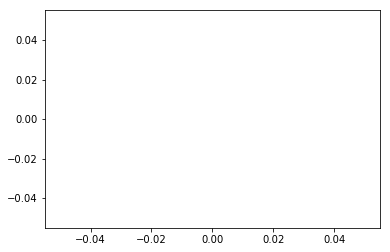

In [48]:
plt.plot(data[100:])

In [43]:
print("Loss first iteration", data[0])
print("Loss iteration at iteration", niter, data[-1])
print("delta of losses", data[0] - data[-1])


Loss first iteration 173286.79514
Loss iteration at iteration 5000 124236.003828
delta of losses 49050.7913119


In [55]:
std_x_test = np.hstack((np.ones((std_x_test.shape[0], 1)), std_x_test))                   

In [56]:
predictions = helper.predict_labels(w, std_x_test)

In [57]:
predictions

array([[-1.],
       [-1.],
       [-1.],
       ..., 
       [ 1.],
       [ 1.],
       [-1.]])

In [58]:
helper.create_csv_submission(ids_test, predictions, 'newton.csv')

### Raw least squares (score: ?)

In [ ]:
(w, loss) = imp.least_squares(y_train, x_train)
loss

### Std least squares (score: 0.73)

In [ ]:
(w, loss) = imp.least_squares(y_train, col_std_x_train)
loss

In [ ]:
(w, loss) = imp.least_squares(y_train, std_x_train)
loss

### Eigenvalues reduction (score: 0.62)

In [ ]:
a = np.matrix([[1,2],[3,4]])
np.tile(a, 2)

In [ ]:
std_x_train = standardize(x_train)

In [ ]:
u, s, v = np.linalg.svd(std_x_train, full_matrices=False)
print('u shape:', u.shape)
print('s shape:', s.shape)
print('v shape:', v.shape)

In [ ]:
plt.plot(s)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [ ]:
shortened_x_train = u[:, :23] @ np.diag(s[:23]) @ v[:23,:]

In [ ]:
shortened_x_train.shape

In [ ]:
(w, loss) = imp.least_squares(y_train, x_train)

In [ ]:
loss

In [ ]:
y_pred = helper.predict_labels(w, x_test)

In [ ]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

In [ ]:
helper.create_csv_submission(ids_test, y_pred, 'shortened_eigenvalues_submission.csv')

In [ ]:
unique_values_per_column_count = [len(set(col)) for col in train_data.T]

In [ ]:
unique_values_per_column_count

In [ ]:
def y_map(y):
    if y == -1:
        return 0
    else:
        return 0.2

y_train_mapped = np.vectorize(y_map)(y_train)

### PCA

In [ ]:
square_train_data = std_x_train.T @ std_x_train

In [ ]:
w, v = np.linalg.eigh(square_train_data)

In [ ]:
print(w.shape[0])
print(v.shape)

In [ ]:
w

In [ ]:
def keep_variance(percentage, vec):
    r = list(range(1, w.shape[0] + 1))
    total = np.sum(vec)
    sums = list(map(lambda i: np.sum(vec[-i:]), r))
    ratio = sums / total
    return np.argmin(abs(ratio - percentage)) + 1

In [ ]:
index_keeper = keep_variance(0.9, w)
print(index_keeper)

In [ ]:
plt.plot(w)
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [ ]:
filtered_v = v[:,-index_keeper:]

In [ ]:
filtered_v.shape

In [ ]:
project_x_train = std_x_train @ filtered_v

In [ ]:
tupled_boson = np.array(list(zip(*filter(lambda pair: pair[1] == -1, zip(project_x_train.tolist(), y_train))))[0])
tupled_other = np.array(list(zip(*filter(lambda pair: pair[1] == 1, zip(project_x_train.tolist(), y_train))))[0])

In [ ]:
tupled_boson.shape

In [ ]:
plt.plot(tupled_boson[1000:2000, :1], tupled_boson[1000:2000, 1:], 'bo')
plt.plot(tupled_other[1000:2000, :1], tupled_other[1000:2000, 1:], 'ro')
plt.show()

In [ ]:
(weight, loss) = imp.least_squares(y_train, project_x_train)

In [ ]:
loss

In [ ]:
y_pred = helper.predict_labels(weight, std_x_test @ filtered_v)

In [ ]:
print('Number of boson:', np.count_nonzero(y_pred+1))
print('Number of other:', np.count_nonzero(y_pred-1))

### Polynomial feature

In [ ]:
np.array(range(2))

In [ ]:
def polynomial_enhancement(x, deg):
    stacked_x = np.tile(x, deg+1)
    power_vec = np.repeat(np.array(range(deg+1)), x.shape[1])
    return stacked_x ** power_vec

In [ ]:
enhanced_col_std_x_train = polynomial_enhancement(std_x_train, 9)
enhanced_col_std_x_test = polynomial_enhancement(std_x_test, 9)
enhanced_col_std_x_train.shape

In [ ]:
def pseudo_least_squares(y, x):
    U, S, V = np.linalg.svd(x, full_matrices=False)
    w = V.T @ np.diag(1/S) @ U.T @ y
    loss = imp.mse(y, x, w)
    return (w, loss)

In [ ]:
(w, loss) = pseudo_least_squares(y_train, enhanced_col_std_x_train)
loss

In [ ]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [ ]:
helper.create_csv_submission(ids_test, y_pred, 'basic_poly_enhancement_9.csv')

#### Cross validation

In [ ]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)

In [ ]:
acc

In [ ]:
enhanced_col_std_x_test = imp.polynomial_enhancement(std_x_test, 5)

In [ ]:
y_pred = helper.predict_labels(w, enhanced_col_std_x_test)

In [ ]:
helper.create_csv_submission(ids_test, y_pred, '0_8_accuracy_poly_5.csv')

In [ ]:
test = []

test.append(1)
test

In [ ]:
acc, loss_train, loss_test, w = imp.cross_validation_v2(y_train, std_x_train, 10, imp.pseudo_least_squares, 5)